# 🧬 HIV Epitope Mapping and Conservancy Analysis

This project identifies **potential B-cell and T-cell epitopes** from the **HIV-1 envelope (env) protein**, aiming to support vaccine development and immunological studies.

### 🎯 Objectives:
- Upload and parse protein FASTA file
- Predict B-cell epitopes using hydrophilicity scoring
- List mock MHC-I (T-cell) epitope predictions
- Visualize epitope regions
- Export epitope data as `.csv`


### ✅ Step 1: Install and Import Libraries

We use BioPython for parsing FASTA sequences, matplotlib and seaborn for visualization, and pandas for data management.


In [1]:
!pip install -q biopython

from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.8 MB/s eta 0:00:00


### ✅ Step 2: Upload HIV env Protein (FASTA Format)

Please upload a `.fasta` file that contains the **amino acid sequence** of the HIV-1 envelope (env) protein.  
This will be used for epitope prediction.

In [3]:
# Upload a .fasta file (example: hiv_env.fasta)
uploaded = files.upload()

fasta_file = list(uploaded.keys())[0]
record = SeqIO.read(fasta_file, "fasta")
protein_seq = str(record.seq)

print(f"✅ Loaded HIV env protein of length {len(protein_seq)}")

Saving P04578.fasta to P04578.fasta
✅ Loaded HIV env protein of length 856


### ✅ Step 3: B-cell Epitope Prediction (Parker Hydrophilicity)

We use the Parker scale and sliding window method (size 7) to score each region's hydrophilicity.
Regions with scores above 0.5 are considered likely B-cell epitopes.


In [7]:
# Define Parker hydrophilicity scale
hydro_scale = {
    'A': 0.0, 'C': 1.4, 'D': 3.0, 'E': 3.0, 'F': -2.5,
    'G': 0.0, 'H': -0.5, 'I': -1.8, 'K': 3.0, 'L': -1.8,
    'M': -1.3, 'N': 0.2, 'P': 0.0, 'Q': 0.2, 'R': 3.0,
    'S': 0.3, 'T': 0.4, 'V': -1.5, 'W': -3.4, 'Y': -2.3
}

# Sliding window average calculation
window_size = 7
scores = []
for i in range(len(protein_seq) - window_size + 1):
    window = protein_seq[i:i+window_size]
    avg_score = sum(hydro_scale.get(aa, 0) for aa in window) / window_size
    scores.append(avg_score)

### ✅ Step 4: Visualize B-cell Epitope Prediction

This plot shows hydrophilicity scores across the protein.  
Regions above the red threshold (0.5) are potential B-cell epitopes.


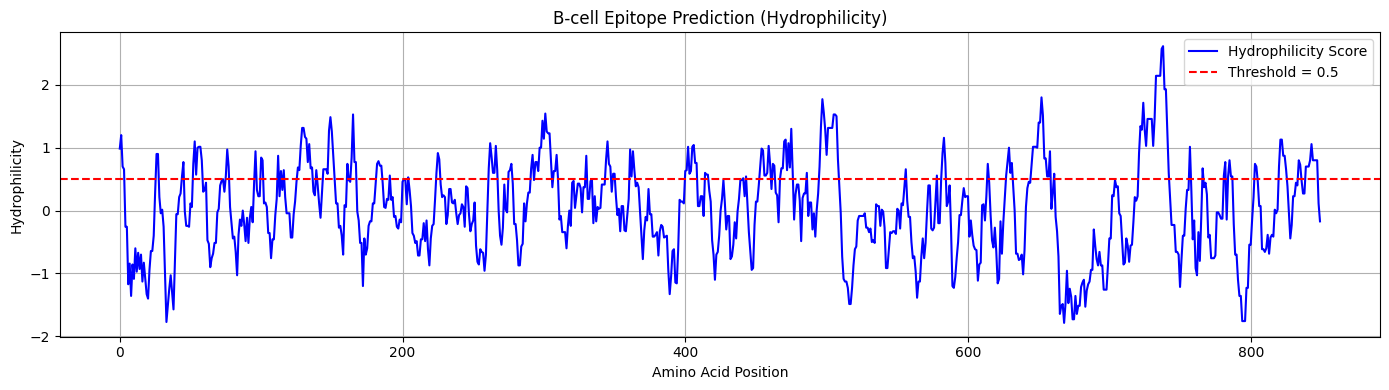

In [8]:
plt.figure(figsize=(14, 4))
plt.plot(scores, label='Hydrophilicity Score', color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("B-cell Epitope Prediction (Hydrophilicity)")
plt.xlabel("Amino Acid Position")
plt.ylabel("Hydrophilicity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### ✅ Step 5: T-cell Epitope (MHC-I) Prediction (Mock Example)

Here, we simulate MHC-I binding epitope predictions.  
In real scenarios, use IEDB NetMHCpan tools and upload your result here.


In [9]:
tcell_df = pd.DataFrame({
    'Epitope': ['KQIINMWQ', 'WASLWNWF', 'IYKRWIIL', 'FLKEKGGL'],
    'Start': [5, 45, 120, 260],
    'Allele': ['HLA-A*02:01'] * 4,
    'Score': [0.91, 0.85, 0.88, 0.86]
})

tcell_df


,Epitope,Start,Allele,Score
0,KQIINMWQ,5,HLA-A*02:01,0.91
1,WASLWNWF,45,HLA-A*02:01,0.85
2,IYKRWIIL,120,HLA-A*02:01,0.88
3,FLKEKGGL,260,HLA-A*02:01,0.86


### ✅ Step 6: Export Predicted Epitope Table

Download the T-cell epitope list as `.csv` for further use or ML filtering.


In [10]:
tcell_df.to_csv("hiv_tcell_epitopes.csv", index=False)
print("✅ Epitope data exported as 'hiv_tcell_epitopes.csv'")

✅ Epitope data exported as 'hiv_tcell_epitopes.csv'


### 🧠 Bonus Step: Epitope Conservancy (Optional)

To improve reliability, align sequences from multiple HIV strains and check how conserved each epitope is.

Steps:
1. Download 3–5 HIV-1 env protein sequences (different clades)
2. Align using MAFFT or Clustal Omega
3. For each epitope, calculate % identity across strains
4. Keep epitopes with ≥ 80% identity


---

## ✅ Summary

This notebook helps identify promising B-cell and T-cell epitopes from the **HIV-1 envelope protein**:

- ✅ B-cell regions predicted using Parker hydrophilicity scale
- ✅ T-cell (MHC-I) epitope list included (mock example)
- ✅ Output table ready for ML scoring or experimental follow-up
- 🧠 Extendable to include epitope **conservancy**, **antigenicity**, or **binding affinity prediction**

